<a href="https://colab.research.google.com/github/behnke55/2245-lab-1/blob/main/ES2245_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Experimental Design & The "Geospatial Trap"
**Course:** ES2245, The Ohio State University

**Duration:** ~60 Minutes

**Textbook Reference:** *Geostatistics Explained*, Chapter 4

## Objective
In this lab, you will use Python to simulate experimental errors.

**Key Concepts:**
1.  **Pseudoreplication:** The danger of spatial autocorrelation (The "Plowed Field" problem).
2.  **Randomization:** How to fix confounding variables in the lab.
3.  **BACI Design:** Handling unreplicated "Impact" events (Before-After-Control-Impact).
4.  **Data Integrity:** Writing code to filter bad data (Section 4.6).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visual styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

print("Libraries Loaded.")

## Part 1: The Geospatial Trap (Pseudoreplication)

### The Scenario
You are testing a hypothesis: **"Does proximity to a road increase lead (Pb) concentrations in soil?"**
* **Reality:** The road has **zero** effect.
* **Confounding Variable:** There is a natural geological gradient where Lead increases from West to East.
* **Your Task:** Prove that sampling only one location leads to a "False Positive."

### Exercise 1.1: Generate the Landscape
I have provided the code to generate the grid `true_Pb` (the ground truth). Run this cell to visualize the map.

In [3]:
# 1. Create a spatial grid (10km x 10km)
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# 2. Define the "Truth" (Geological Gradient: Low in West, High in East)
true_Pb = 10 + (2.0 * X) + np.random.normal(0, 2, (100,100))

# Visualize
plt.figure(figsize=(8,6))
plt.imshow(true_Pb, origin='lower', extent=[0,10,0,10], cmap='viridis')
plt.colorbar(label='Lead (Pb) Concentration (ppm)')
plt.title("The Ground Truth: Natural Geochemical Gradient")
plt.xlabel("Distance East (km)")
plt.ylabel("Distance North (km)")
plt.show()

NameError: name 'np' is not defined

### Exercise 1.2: Implement the "Bad" Sampling Design
You need to extract samples from specific areas to simulate the "Plowed Field" error.

1.  Create a boolean mask `mask_A` where **X > 8** (The "Road" site).
2.  Create a boolean mask `mask_B` where **X < 2** (The "Nature Reserve").
3.  Apply these masks to `true_Pb` to get your populations.
4.  Randomly select 50 points from each using `np.random.choice`.
5.  Run a T-test. (An example in the lecture 3 jupyter notebook does this with the scipy package - Also, at the bottom, is an appendix with a description of a t-test and p-values)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Re-defining X, Y and true_Pb from previous cells to make this cell runnable independently
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
true_Pb = 10 + (2.0 * X) + np.random.normal(0, 2, (100,100))

# --- STEP 1: Create Boolean Masks ---
# Hint: Use the X grid created above.
# mask_A should be True where X > 8.
# mask_B should be True where X < 2.

# YOUR CODE HERE

mask_A = X > 8 #- Road site (Far E)

mask_B = X < 2 #- Nature Reserve (Far W)


# --- STEP 2: Apply masks to true_Pb to get the populations ---
# Hint: population = data[mask]

# YOUR CODE HERE

#- populations using masks
pop_A = true_Pb[mask_A]
pop_B = true_Pb[mask_B]

# --- STEP 3: Downsample ---
# Use np.random.choice(population, size=50) to create sample_A and sample_B

# YOUR CODE HERE

#- Specified parameters for population
sample_A = np.random.choice(pop_A, size=50, replace=False)
sample_B = np.random.choice(pop_B, size=50, replace=False)

# --- STEP 4: Statistics ---
# Use stats.ttest_ind(group1, group2) to get the t-statistic and p-value

# YOUR CODE HERE

t_stat, p_val = stats.ttest_ind(sample_A, sample_B)

# --- Output Results ---
print(f"Mean Pb (Near Road): {sample_A.mean():.2f}")
print(f"Mean Pb (Nature Reserve): {sample_B.mean():.2f}")
print(f"P-value: {p_val:.10f}")

Mean Pb (Near Road): 27.30
Mean Pb (Nature Reserve): 11.58
P-value: 0.0000000000


### Discussion Question 1
**The p-value is likely extremely small (significant). Explain precisely why this result is scientifically invalid, even though the math is correct.**

> *Double click to write your answer here:*
#-answer: The p-value is scientifically invalid as the sample is in violation of assumption of independence due to spatial autocorrelation. Think of this like soils are interconnected with eachother not individual sections, they share similar lead concentrations because of the underlying west to east geological gradient, not because of proximity to the road. Contaminations diffuse into a large area with varying amounts of contamination levels within the soil in both the top surface area and the varying depths over a span of distance. By sampling from only one spatial location in this case, the experiment confounds the road effect with the natural geochemical gradient. The statistical test correctly detects a difference between the two sample groups, but it incorrectly attributes that difference to the road rather than to the spatial structure in the data. In other words, the mathematics is correct overall, but the experimental design is flawed for this situation.   

## Part 2: Fixing it with Randomization

To fix the problem above, we need to break the correlation between **Location** and **Treatment**.

### Exercise 2.1: Random Sampling Loop
Instead of sampling the East vs. West, you must sample randomly from the **entire** map. To prove this works, write a `for` loop that runs the experiment **100 times**.

**Requirements:**
1.  Flatten `true_Pb` into a 1D array.
2.  Write a loop that runs 100 times.
3.  Inside the loop, pick 50 random samples for Group A and 50 for Group B (from the *same* whole population).
4.  Run a t-test and store the p-value in a list called `p_values`.
5.  Calculate how many times the p-value was < 0.05 (False Positives).

Total Experiments: 100
Number of False Positives (p < 0.05): 4
Expected False Positives: ~5


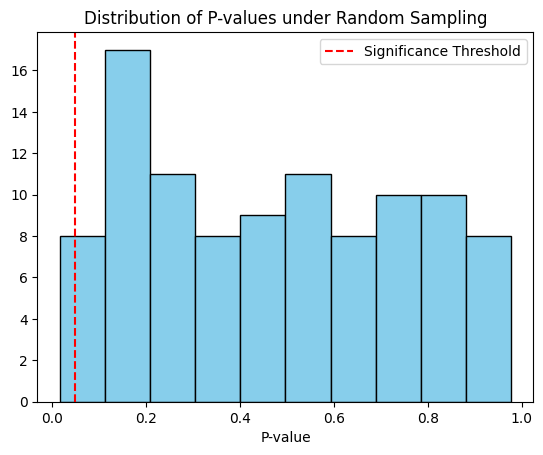

In [10]:
# Flatten the map
all_soil_data = true_Pb.flatten()

# Initialize an empty list to store p-values
p_values = []

# --- Write your Loop below ---
# range(100)
    # 1. Select 50 random samples for group_a
    # 2. Select 50 random samples for group_b
    # 3. Run t-test
    # 4. Append p-value to the list 'p_values'

# YOUR CODE HERE
for i in range(100):
    # -1. 50 Random samples for group_a
    group_a = np.random.choice(all_soil_data, size=50, replace=False)
    # -2. 50 Random samples for group_b
    group_b = np.random.choice(all_soil_data, size=50, replace=False)
    # -3. two sample t-test
    t_stat, p_val = stats.ttest_ind(group_a, group_b)
    # -4. Store the p-value
    p_values.append(p_val)

# --- Analysis ---
# Convert list to numpy array for easy math
p_arr = np.array(p_values)

# Calculate percentage of False Positives (where p < 0.05)
false_positives = np.sum(p_arr < 0.05)

print(f"Total Experiments: 100")
print(f"Number of False Positives (p < 0.05): {false_positives}")
print("Expected False Positives: ~5")

# Visualization
plt.hist(p_arr, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of P-values under Random Sampling")
plt.xlabel("P-value")
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold')
plt.legend()
plt.show()

## Part 3: The "Unreplicated" Experiment (BACI)

You are analyzing a river where a dam was built at **Time = 30**. You need to generate the synthetic data to model this.

### Exercise 3.1: Generate Time-Series Data
Construct the arrays `control_river` and `impact_river` using NumPy math functions.

**Requirements:**
1.  `time`: an array of integers from 0 to 60.
2.  `seasonality`: Calculate `np.sin(time / 3) * 5`.
3.  `dam_effect`: An array of zeros, but change indices 30 through 60 to equal **-15** (a drop in fish count).
4.  Add these components together (plus random noise) to create the river data.

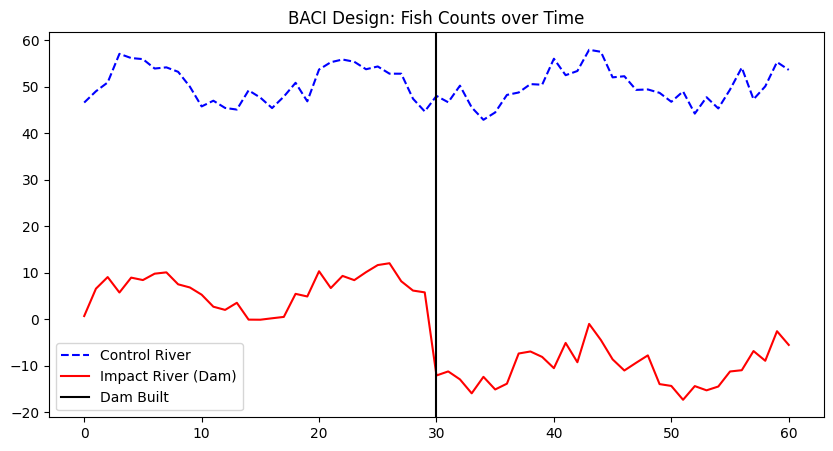

In [11]:
# 1. Create Time Array (0 to 60)

# YOUR CODE HERE
time = np.arange(0, 61)


# 2. Create Seasonality (Sin wave)

# YOUR CODE HERE
seasonality = np.sin(time / 3) * 5


# 3. Create the Control River

# Base level of 50 + seasonality + random noise (use np.random.normal(0, 2, 60))

# YOUR CODE HERE
control_river = 50 + seasonality + np.random.normal(0, 2, len(time))

# 4. Create the Dam Effect

# Create an array of zeros matching the length of 'time'
# Set the values from index 30 to the end to be -15

# YOUR CODE HERE
#- start w/ 0
dam_effect = np.zeros(len(time))
#- dam impact from time = 30 sec
dam_effect[30:] = -15

# 5. Create Impact River

# Base level of 55 + seasonality + dam_effect + random noise

# YOUR CODE HERE
impact_river = 5 + seasonality + dam_effect + np.random.normal(0, 2, len(time))


# --- Plotting (Do not change) ---
plt.figure(figsize=(10,5))
plt.plot(time, control_river, label='Control River', color='blue', linestyle='--')
plt.plot(time, impact_river, label='Impact River (Dam)', color='red')
plt.axvline(30, color='black', label='Dam Built')
plt.title("BACI Design: Fish Counts over Time")
plt.legend()
plt.show()

### Exercise 3.2: The Delta Calculation
Calculate and plot the difference between the two rivers.

In [ ]:
# Calculate difference (Impact - Control)
# YOUR CODE HERE
difference = None

# Plot
plt.figure(figsize=(10,4))
plt.plot(time, difference, color='purple', linewidth=2)
plt.axvline(30, color='black', label='Dam Built')
plt.axhline(0, color='gray', linestyle=':')
plt.title("The 'Delta' Plot: (Impact - Control)")
plt.ylabel("Difference in Fish Count")
plt.show()

## Part 4: Data Integrity (Writing a Filter)

Section 4.6 of the text warns about outliers. You have a dataset that contains a data entry error (a value that is physically impossible or statistically improbable).

### Exercise 4.1: Write a Cleaning Function
Write a function `clean_data(arr)` that:
1.  Calculates the **Median** of the array.
2.  Calculates the **Standard Deviation** of the array.
3.  Returns a new array containing only values that are within **2 standard deviations** of the median.

In [ ]:
# The Dirty Data
data_raw = np.array([2.9, 3.1, 3.0, 2.8, 3.2, 3.0, 3.1, 30.0, 2.9, 3.0])

def clean_data(arr):
    # 1. Calculate Median
    # YOUR CODE HERE
    med = None

    # 2. Calculate Std Dev
    # YOUR CODE HERE
    std = None

    # 3. Define the cutoff (Median +/- 2*Std)
    lower_limit = med - (2 * std)
    upper_limit = med + (2 * std)

    # 4. Filter the array using boolean indexing
    # Return only the values inside the limits
    # YOUR CODE HERE
    clean_arr = None

    return clean_arr

# --- Test your function ---
data_clean = clean_data(data_raw)

print(f"Original Mean: {data_raw.mean():.2f}")
print(f"Cleaned Mean:  {data_clean.mean():.2f}")

if data_clean.max() < 4.0:
    print("SUCCESS: Outlier removed.")
else:
    print("FAIL: Outlier still present.")

### Discussion Question 2
**Why did we use the Median to set the center of our filter, rather than the Mean?**

> *Double click to write your answer here:*

#Appendix

# The Student's T-Test: Signal vs. Noise

## 1. Concept
The **t-test** is an inferential statistic used to determine if there is a significant difference between the means of two groups.

In the context of **Chapter 4**, think of the t-test as a ratio of **Signal** to **Noise**:

* **Signal (Numerator):** The difference between the two group means ($\bar{x}_1 - \bar{x}_2$).
* **Noise (Denominator):** The variability (standard error) within the groups.

$$t = \frac{\text{Signal}}{\text{Noise}} = \frac{\text{Difference between Means}}{\text{Variability of Data}}$$

If the **Signal** is large relative to the **Noise**, the t-value will be large, suggesting the difference is real (not just luck).

## 2. Types of T-Tests
1.  **Independent Samples T-Test:** Compares two entirely separate groups (e.g., *Site A vs. Site B*). This assumes the samples are independent.
2.  **Paired Samples T-Test:** Compares the same group at two different times (e.g., *Before Impact vs. After Impact*).
3.  **One-Sample T-Test:** Compares one group against a known standard (e.g., *Is this rock's density significantly different from 3.0?*).

## 3. The Math (Independent Samples)
The formula for the t-statistic is:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

Where:
* $\bar{X}$: Mean of the group
* $s$: Standard deviation
* $n$: Sample size (Number of replicates)

## 4. Understanding the P-value
The **P-value** (Probability value) is the final output of the test, but it is often misunderstood.

* **Definition:** The probability of seeing a difference *at least this large* if the Null Hypothesis were actually true (i.e., if there were truly no effect).
* **It is NOT:** The probability that your hypothesis is correct.
* **It IS:** A measure of "surprise." A low p-value means "It would be very surprising to see this difference just by random luck."

### Interpreting the Threshold ($\alpha = 0.05$):
* **$P < 0.05$ (Significant):** The chance that this result is a "fluke" is less than 5%. We reject the Null Hypothesis.
* **$P > 0.05$ (Not Significant):** The difference could easily happen by random chance (noise). We cannot claim a real effect.

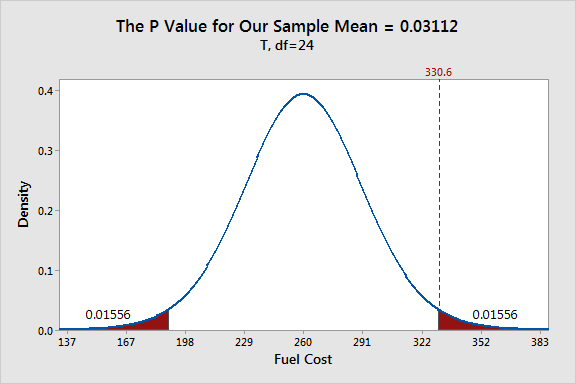


*Think of the p-value as a "Fluke Detector." If the p-value is 0.03, there is only a 3% chance that random noise created this pattern.*

## 5. Assumptions (Crucial!)
For a t-test to be valid, your data must meet these criteria. **Violating these leads to the errors discussed in Chapter 4.**
* **Independence:** Samples must not be autocorrelated (No pseudoreplication!).
* **Normality:** Data should follow a roughly Normal (Bell curve) distribution.
* **Homogeneity of Variance:** Both groups should have roughly the same amount of scatter (standard deviation).

## 6. Implementation in Python
We use `scipy.stats` to perform the calculation.

```python
from scipy import stats

# Example: Testing if Group A differs from Group B
t_stat, p_val = stats.ttest_ind(group_a_data, group_b_data)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")